###For this analysis, we have marketing campaign data for customers who responded to our promotional out reach. Our role is to build a model that will help us predict future responses and non responses. We hence will try a number of machine learning classifiers and choose the one that gives us the best performance.

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance

In [157]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
marketing=pd.read_csv('/content/drive/MyDrive/ML Learning csv/marketing_campaign.csv')

In [159]:
df=marketing
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [160]:
df.shape# take a rough look over the dataset

(2240, 29)

In [161]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [162]:
df.isnull().sum()#check missing value

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [163]:
df['Income'] = df['Income'].fillna(df.Income.mean(), axis = 0)#fill the na value with the mean of income ,since we can not drop the na simply or fill it simply with 0 in this case
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [164]:
df.duplicated().sum()#check duplicated

0

In [165]:
df.info()#check the datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [166]:
#Convert the date column to date type column, and divide into three columns
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Year_Customer'] = df['Dt_Customer'].apply(lambda x: x.year)
df['Month_Customer'] = df['Dt_Customer'].apply(lambda x: x.month)
df['Day_Customer'] = df['Dt_Customer'].apply(lambda x: x.day)
df = df.drop('Dt_Customer', axis=1)

In [167]:
le=LabelEncoder()#encode the education column
label=le.fit_transform(df['Education'])
label
df.drop('Education',axis=1)
df['Education']=label

In [168]:
label1=le.fit_transform(df['Marital_Status'])#encode the marital_Status column
df.drop('Marital_Status',axis=1)
df['Marital_Status']=label1
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,Month_Customer,Day_Customer
0,5524,1957,2,4,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012,9,4
1,2174,1954,2,4,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014,3,8
2,4141,1965,2,5,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013,8,21
3,6182,1984,2,5,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014,2,10
4,5324,1981,4,3,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,2013,6,13
2236,4001,1946,4,5,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,2014,6,10
2237,7270,1981,2,2,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,2014,1,25
2238,8235,1956,3,5,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,2014,1,24


In [169]:
#filtering the features with only one class or single value and drop
for col in df.columns :
    if len(df[col].value_counts()) == 1 :
        print(df[col].value_counts())

3    2240
Name: Z_CostContact, dtype: int64
11    2240
Name: Z_Revenue, dtype: int64


####Selecting best features

In [170]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [171]:
# Create the object for SelectKBest and fit and transform the classification data
# k is the number of features you want to select [here it's 2]
select = SelectKBest(score_func=chi2, k=24)

In [172]:
# Create feature and target variable for Classification problem
#From here we shall select the best variables and drop the worst
X_class=df.iloc[:,0:27]
X_class= df.drop('Response', axis=1)

In [173]:
y_class = df['Response']

In [174]:
 z = select.fit_transform(X_class,y_class)

In [175]:
print("After selecting best 24 features:", z.shape) 

After selecting best 24 features: (2240, 24)


In [176]:
print(z[:5])

[[5.5240e+03 1.9570e+03 2.0000e+00 4.0000e+00 5.8138e+04 0.0000e+00
  0.0000e+00 5.8000e+01 6.3500e+02 8.8000e+01 5.4600e+02 1.7200e+02
  8.8000e+01 8.8000e+01 8.0000e+00 1.0000e+01 4.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 9.0000e+00 4.0000e+00]
 [2.1740e+03 1.9540e+03 2.0000e+00 4.0000e+00 4.6344e+04 1.0000e+00
  1.0000e+00 3.8000e+01 1.1000e+01 1.0000e+00 6.0000e+00 2.0000e+00
  1.0000e+00 6.0000e+00 1.0000e+00 1.0000e+00 2.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 3.0000e+00 8.0000e+00]
 [4.1410e+03 1.9650e+03 2.0000e+00 5.0000e+00 7.1613e+04 0.0000e+00
  0.0000e+00 2.6000e+01 4.2600e+02 4.9000e+01 1.2700e+02 1.1100e+02
  2.1000e+01 4.2000e+01 8.0000e+00 2.0000e+00 1.0000e+01 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 8.0000e+00 2.1000e+01]
 [6.1820e+03 1.9840e+03 2.0000e+00 5.0000e+00 2.6646e+04 1.0000e+00
  0.0000e+00 2.6000e+01 1.1000e+01 4.0000e+00 2.0000e+01 1.0000e+01
  3.0000e+00 5.0000e+00 2.0000e+00 0.0000e+00

In [177]:
#Best features- ID,Year_Birth ,Education ,Marital_Status ,Income,Kidhome,Teenhome,Recency,MntWines ,MntFruits ,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp3 ,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,	Month_Customer,	Day_Customer

In [178]:
#Worst features to drop- NumWebVisitsMonth,Z_Revenue,Year_Customer,Z_CostContact,NumDealsPurchases

In [179]:
pd.set_option('display.max_columns', None)
X_class

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Year_Customer,Month_Customer,Day_Customer
0,5524,1957,2,4,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,2012,9,4
1,2174,1954,2,4,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,2014,3,8
2,4141,1965,2,5,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,2013,8,21
3,6182,1984,2,5,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,2014,2,10
4,5324,1981,4,3,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,2014,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,2013,6,13
2236,4001,1946,4,5,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,2014,6,10
2237,7270,1981,2,2,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,2014,1,25
2238,8235,1956,3,5,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,2014,1,24


In [180]:
print(X_class[:5])

     ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957          2               4  58138.0        0         0   
1  2174        1954          2               4  46344.0        1         1   
2  4141        1965          2               5  71613.0        0         0   
3  6182        1984          2               5  26646.0        1         0   
4  5324        1981          4               3  58293.0        1         0   

   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0       58       635         88              546              172   
1       38        11          1                6                2   
2       26       426         49              127              111   
3       26        11          4               20               10   
4       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88          

In [181]:
#Specify the dependent variable and independent variable
y=df['Response']
x=df.drop(['ID','Response', 'NumWebVisitsMonth','Z_Revenue','Year_Customer','Z_CostContact','NumDealsPurchases'],axis=1)
x

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Month_Customer,Day_Customer
0,1957,2,4,58138.0,0,0,58,635,88,546,172,88,88,8,10,4,0,0,0,0,0,0,9,4
1,1954,2,4,46344.0,1,1,38,11,1,6,2,1,6,1,1,2,0,0,0,0,0,0,3,8
2,1965,2,5,71613.0,0,0,26,426,49,127,111,21,42,8,2,10,0,0,0,0,0,0,8,21
3,1984,2,5,26646.0,1,0,26,11,4,20,10,3,5,2,0,4,0,0,0,0,0,0,2,10
4,1981,4,3,58293.0,1,0,94,173,43,118,46,27,15,5,3,6,0,0,0,0,0,0,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,3,61223.0,0,1,46,709,43,182,42,118,247,9,3,4,0,0,0,0,0,0,6,13
2236,1946,4,5,64014.0,2,1,56,406,0,30,0,0,8,8,2,5,0,0,0,1,0,0,6,10
2237,1981,2,2,56981.0,0,0,91,908,48,217,32,12,24,2,3,13,0,1,0,0,0,0,1,25
2238,1956,3,5,69245.0,0,1,8,428,30,214,80,30,61,6,5,10,0,0,0,0,0,0,1,24


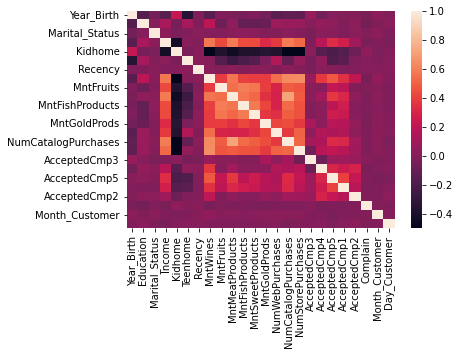

In [182]:
corr_matrix=x.corr()#check correlation
sns.heatmap(corr_matrix)

In [183]:
corr_matrix

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Month_Customer,Day_Customer
Year_Birth,1.000000,-0.171390,-0.060580,-0.160942,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.145040,-0.121275,-0.128272,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,0.024246,-0.009193
Education,-0.171390,1.000000,0.007090,0.119974,-0.045564,0.118485,-0.011728,0.197576,-0.080412,0.033625,-0.112223,-0.105217,-0.095489,0.081908,0.070782,0.070483,0.005836,0.053266,0.033346,-0.010845,0.021369,-0.050540,-0.011304,0.018291
Marital_Status,-0.060580,0.007090,1.000000,0.021267,-0.022553,-0.003596,0.014159,0.008205,0.000593,0.030689,0.035808,0.017382,0.001688,-0.001894,0.015125,0.001412,-0.027113,0.014381,0.012817,-0.017097,0.018417,-0.005718,0.017708,-0.016087
Income,-0.160942,0.119974,0.021267,1.000000,-0.425176,0.019018,-0.003946,0.576789,0.428747,0.577802,0.437497,0.436162,0.321978,0.380550,0.586725,0.526489,-0.016168,0.182791,0.334850,0.274921,0.087538,-0.027223,-0.014888,-0.031058
Kidhome,0.230176,-0.045564,-0.022553,-0.425176,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,-0.361647,-0.502237,-0.499683,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,-0.023571,-0.001718
Teenhome,-0.352111,0.118485,-0.003596,0.019018,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.155500,-0.110769,0.050695,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,-0.014124,0.005697
Recency,-0.019871,-0.011728,0.014159,-0.003946,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.010726,0.025110,0.000799,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,0.014040,0.010877
MntWines,-0.157773,0.197576,0.008205,0.576789,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.542265,0.635226,0.642100,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,0.046139,-0.000413
MntFruits,-0.017917,-0.080412,0.000593,0.428747,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,0.296735,0.487917,0.461758,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,0.003741,-0.020998
MntMeatProducts,-0.030872,0.033625,0.030689,0.577802,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,0.293761,0.723827,0.479659,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,0.018390,-0.012561


In [184]:
#import logistic model
x1=sm.add_constant(x)
logr_model=sm.Logit(y,x)
logr_fit=logr_model.fit()
print(logr_fit.summary())

Optimization terminated successfully.
         Current function value: 0.293985
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 2240
Model:                          Logit   Df Residuals:                     2216
Method:                           MLE   Df Model:                           23
Date:                Tue, 04 Oct 2022   Pseudo R-squ.:                  0.3020
Time:                        16:29:09   Log-Likelihood:                -658.53
converged:                       True   LL-Null:                       -943.39
Covariance Type:            nonrobust   LLR p-value:                9.979e-106
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Year_Birth             -0.0010      0.000     -3.902      0.000      -0.001      -0.000
Ed

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [185]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)#divide the train ,test group

In [186]:
# Import MinMaxScaler
from sklearn.preprocessing import  MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(x_train)
rescaledX_test = scaler.fit_transform(x_test)

###LOGISTIC MODEL

In [187]:
logreg=LogisticRegression()
loggreg_final=logreg.fit(rescaledX_train,y_train)
print(loggreg_final.score(rescaledX_train,y_train))

0.8872767857142857


In [188]:
y_pred=logreg.predict(rescaledX_test)

#Confusion matrix for the logistic model prediction
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[354  22]
 [ 42  30]]


In [189]:
#Classification report for logistic model prediction
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       376
           1       0.58      0.42      0.48        72

    accuracy                           0.86       448
   macro avg       0.74      0.68      0.70       448
weighted avg       0.84      0.86      0.85       448



Logistic model Hyperparameter tuning

In [190]:
# Import GridSearchCV Logistic
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001 and 0.0001]
C = np.logspace(-4, 4, 20)
max_iter= [100, 1000,2500, 5000]

param_grid = dict(tol= tol, max_iter= max_iter,C=C)

In [191]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(x)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.882143 using {'C': 0.615848211066026, 'max_iter': 100, 'tol': 0.01}


###SVM Model

In [192]:
#SVM model
svc_model=svm.SVC(kernel='linear')
svc_final=svc_model.fit(rescaledX_train,y_train)
print(svc_final.score(rescaledX_train,y_train))

0.8727678571428571


In [193]:
y_pred1=svc_model.predict(rescaledX_test)
print(classification_report(y_test,y_pred1))#classification report for svm model prediction

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       376
           1       0.62      0.22      0.33        72

    accuracy                           0.85       448
   macro avg       0.74      0.60      0.62       448
weighted avg       0.83      0.85      0.82       448



In [194]:
cm2=confusion_matrix(y_test, y_pred1)#confusion matrix for the svm model prediction
print(cm2)

[[366  10]
 [ 56  16]]


In [195]:
print(svc_model.coef_)# obtain features weight to see which factor is more important

[[ 0.40403622  0.2491502  -0.13713912 -0.38049924  0.02101969 -0.20109833
  -0.54681106  0.2059866   0.22427323  0.45653314 -0.06008701 -0.12830137
   0.24336031  0.43548704  0.06866125 -0.52864172  0.36489027  0.29861643
   1.28671101  0.4014928   0.28938259  0.19203627  0.06021474 -0.0539002 ]]


SVM Hyperparameter tuning

In [196]:
# Import GridSearchCV Logistic
from sklearn.model_selection import GridSearchCV

# Define the grid of values
C = [0.1, 1, 10, 100, 1000]
gamma = [1, 0.1, 0.01, 0.001, 0.0001]

param_grid = dict(C=C,gamma=gamma)

In [197]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(x)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.874107 using {'C': 1000, 'gamma': 1}


###XGB Model

In [198]:
#XGB model
from xgboost import XGBClassifier
clf2 = XGBClassifier()
clf2_final=clf2.fit(rescaledX_train,y_train)
print(clf2_final.score(rescaledX_train,y_train))

0.9363839285714286


In [199]:
y_pred1=clf2.predict(rescaledX_test)
print(classification_report(y_test,y_pred1))#classification report for xgb prediction

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       376
           1       0.57      0.47      0.52        72

    accuracy                           0.86       448
   macro avg       0.73      0.70      0.72       448
weighted avg       0.85      0.86      0.85       448



In [200]:
cm3=confusion_matrix(y_test, y_pred1)#confusion matrix for the xgb prediction
print(cm3)

[[350  26]
 [ 38  34]]


XGB Model Hyper parameter tuning

In [201]:
# Import GridSearchCV XGBoost
from sklearn.model_selection import GridSearchCV

# Define the grid of values
max_depth = [4,5,6,8]
n_estimators = [60,220,500,750]
learning_rate = [0.1, 0.01, 0.05]
min_child_weight =[6,8,10]

param_grid = dict(max_depth=max_depth,n_estimators=n_estimators,learning_rate=learning_rate,min_child_weight=min_child_weight)

In [202]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=clf2, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(x)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.877679 using {'learning_rate': 0.01, 'max_depth': 8, 'min_child_weight': 12, 'n_estimators': 750}


###Performance results

###Logistic model


*   Logistic model before tuning-0.887276
*   Logistic model after tuning-0.882143 

###SVM model

*   SVM model before tuning-0.87276
*   SVM model after tuning-0.87410

###XBG model

*   XGB model before tuning-0.93638
*   XGB model after tuning-0.8776
